In [2]:
# Project 3 _ bike sharing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CBS_2021-2023_Full.csv')


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_16124\2044023505.py:8: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CBS_2021-2023_Full.csv')


In [3]:
df.shape

(10693997, 13)

In [4]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [6]:
string_col = df.select_dtypes(include="object").columns

In [7]:
df[string_col].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,member


In [8]:
# Check unique values before conversion
unique_values_before = df.nunique()
print("Unique values before conversion:\n", unique_values_before, '\n')

Unique values before conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1891
end_station_name           865
end_station_id            1904
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [9]:
# Check Memory usage before converting
memory_usage = df.memory_usage(deep=True)
print("Memory Usage before Converting dtypes:\n", memory_usage, '\n')

Memory Usage before Converting dtypes:
 Index                       132
ride_id               695109805
rideable_type         654238494
started_at            727191796
ended_at              727191796
start_station_name    740478725
start_station_id      343549594
end_station_name      736905216
end_station_id        343530364
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual         588169835
dtype: int64 



In [10]:
# Copy the dataframe
df2 = df.copy()

# Convert categorical columns to category type for memory efficiency
df2["rideable_type"] = df2["rideable_type"].astype("category")
df2["start_station_name"] = df2["start_station_name"].astype("category")
df2["end_station_name"] = df2["end_station_name"].astype("category")
df2["member_casual"] = df2["member_casual"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
df2['started_at'] = pd.to_datetime(df2['started_at'])
df2['ended_at'] = pd.to_datetime(df2['ended_at'])

# Regenerate the entire ride_id column with sequential integers and convert it
# to a memory-efficient data type (uint32)
df2['ride_id'] = pd.Series(range(1, len(df2) + 1), dtype='uint32')

In [11]:
# Check info and dtypes after conversion
info_after = df2.info()
print("Info of the DataFrame after conversion:\n", info_after, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             uint32        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(4), datetime64[ns](2), float64(4), object(2), uint32(1)
memory usage: 754.8+ MB
Info of the DataFrame after conversion:
 None 



In [12]:
# Check unique values after conversion
unique_values_after = df2.nunique()
print("Unique values after conversion:\n", unique_values_after, '\n')

Unique values after conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1891
end_station_name           865
end_station_id            1904
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [13]:
# Check memory usage after all conversions
print("Memory Usage after Converting dtype:\n", df2.memory_usage(deep=True), '\n')

Memory Usage after Converting dtype:
 Index                       132
ride_id                42775988
rideable_type          10694288
started_at             85551976
ended_at               85551976
start_station_name     21485201
start_station_id      343549594
end_station_name       21485559
end_station_id        343530364
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual          10694215
dtype: int64 



In [14]:
# Calculate how much we reduced the in-memory footprint of the dataset
reduction = df2.memory_usage(deep=True).sum() / df.memory_usage(deep=True).sum()
print(f"We reduced the in-memory footprint of the dataset to {reduction:.2f} of its original size.")

We reduced the in-memory footprint of the dataset to 0.22 of its original size.


In [15]:
#Check for duplicates
df2.duplicated().sum()

0

In [16]:
# Checking for NULLs in the data
df2.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [17]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
ride_id,10693997.0,5346999.0,1.0,2673500.0,5346999.0,8020498.0,10693997.0,3087091.167669
started_at,10693997,2022-09-13 17:52:21.865432320,2021-01-01 00:08:33,2021-12-16 10:45:23,2022-09-22 08:29:17,2023-06-18 21:42:53,2023-12-31 23:59:38,NaN
ended_at,10693997,2022-09-13 18:15:16.333648896,2021-01-01 00:21:00,2021-12-16 11:00:56,2022-09-22 08:44:49,2023-06-18 22:08:16,2024-01-02 00:41:36,NaN
start_lat,10693995.0,38.903306,38.76,38.890539,38.90276,38.914751,39.14,0.026842
start_lng,10693995.0,-77.031872,-77.4,-77.044609,-77.031617,-77.013667,-76.82,0.033462
end_lat,10677232.0,38.902256,0.0,38.890496,38.902314,38.912648,39.19,0.050493
end_lng,10677232.0,-77.031463,-77.56,-77.044661,-77.0315,-77.012808,0.0,0.091278


In [18]:
# create specific period/date/time columns

df3=df2.copy()

# based on start date/time stamp
StartTime = df3['started_at']

# create date column without time
dates = StartTime.values.astype('datetime64[D]')
df3['date'] = dates

# create year column
years = StartTime.values.astype('datetime64[Y]').astype(int) + 1970
df3['year']=years

# create month column
months = StartTime.values.astype('datetime64[M]').astype(int) % 12 + 1
df3['month']=months

# create day column
days = pd.to_datetime(df3['started_at']).dt.day
df3['day'] = days

df3.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,year,month,day
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.89460,-77.072305,member,2021-01-01,2021,1,1
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.96000,-77.020000,casual,2021-01-01,2021,1,1
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.92087,-77.031691,member,2021-01-01,2021,1,1


In [19]:
## other option to display date/period/time


# print date_df.astype('M8[D]') # ['2016-09-29' '2016-09-28' ]
# print date_df.astype('M8[M]') # ['2016-09' '2016-09']
# print date_df.astype('M8[Y]') # ['2016' '2016']

df3.tail(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,year,month,day
10693994,10693995,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual,2023-12-31,2023,12,31
10693995,10693996,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual,2023-12-31,2023,12,31
10693996,10693997,electric_bike,2023-12-31 23:59:38,2024-01-01 00:10:44,4th & Florida Ave NE,31532.0,NaN,NaN,38.907130,-77.000966,38.920000,-77.000000,member,2023-12-31,2023,12,31


In [20]:
#extract time

# create hour column
hours = pd.to_datetime(df3['started_at']).dt.hour
df3['hour']=hours

# create minute column
minutes = pd.to_datetime(df3['started_at']).dt.minute
df3['minute']=minutes


days_of_week = pd.to_datetime(df3['started_at']).dt.day_name(locale = 'English') 
df3['day_of_week']=days_of_week


# Morning / Afternoon / Evening / Night
# Quartal
# seasons


df3.tail(3)




,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,year,month,day,hour,minute,day_of_week
10693994,10693995,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual,2023-12-31,2023,12,31,23,59,Sunday
10693995,10693996,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual,2023-12-31,2023,12,31,23,59,Sunday
10693996,10693997,electric_bike,2023-12-31 23:59:38,2024-01-01 00:10:44,4th & Florida Ave NE,31532.0,NaN,NaN,38.907130,-77.000966,38.920000,-77.000000,member,2023-12-31,2023,12,31,23,59,Sunday


In [21]:
df3.shape

(10693997, 20)

In [22]:
# compile data by member/casual on hourly basis

result = df3.loc[(df3['date'] == "2021-11-07")&(df3['hour'] >= 0)&(df3['hour'] <= 5)]
test1=result[['date','hour','ride_id','member_casual','day_of_week']]
grouped_date_hour_RideCount = test1.groupby(['day_of_week','date','hour', 'member_casual'], observed=False)['ride_id'].count().unstack()
grouped_date_hour_RideCount.T

day_of_week       Sunday                     
date          2021-11-07                     
hour                   0    1   2   3   4   5
member_casual                                
casual                91   94  28  10  13   8
member               147  136  30   6  11  12

<Figure size 800x500 with 0 Axes>

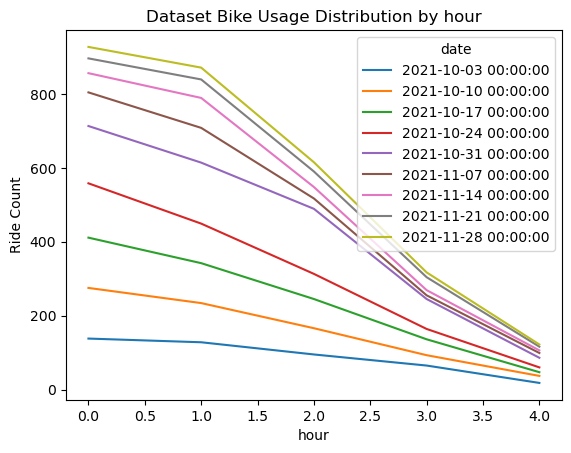

In [23]:
# check usage trend on specific times/dates

result2 = df3.loc[(df3['day_of_week'] == "Sunday")&(df3['month']>=10)&(df3['month']<=11)&(df3['hour'] >= 0)&(df3['hour'] <= 4)]
test2=result2[['day_of_week','year','month','date','hour','ride_id','member_casual']]
test3=test2.loc[(test2['year'] == 2021)&(test2['member_casual']=='casual')]
grouped_date_hour_RideCount_2 = test3.groupby(['date','hour'], observed=False)['ride_id'].count().unstack()

plt.figure(figsize=(8,5))
grouped_date_hour_RideCount_2.T.plot(kind='line', stacked=True)

# Add labels and title
plt.xlabel('hour')
plt.ylabel('Ride Count')
plt.title('Dataset Bike Usage Distribution by hour')
plt.show()


In [24]:
df4= df3.copy()
df4.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
date                       0
year                       0
month                      0
day                        0
hour                       0
minute                     0
day_of_week                0
dtype: int64

In [25]:
# (10693997, 13)

df4.shape

(10693997, 20)

<Figure size 800x500 with 0 Axes>

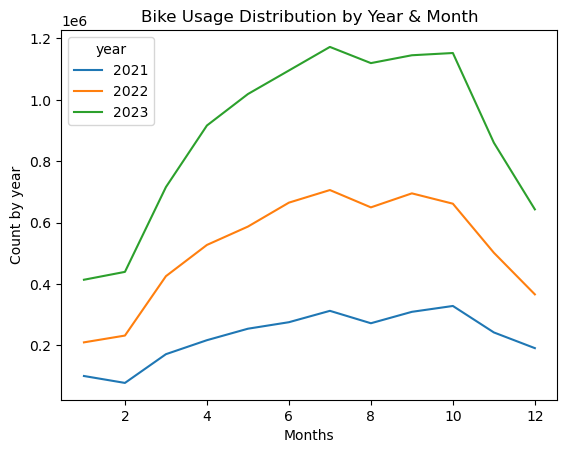

In [26]:
# usage by month
grouped_usage_month_df = df4.groupby(['year','month'], observed=False)['ride_id'].count().unstack()
grouped_usage_month_df.T

plt.figure(figsize=(8,5))
grouped_usage_month_df.T.plot(kind='line', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add labels and title
plt.xlabel('Months')
#    x axis scale to be incremented by 1 to show each month
plt.ylabel('Count by year')
#    y axis metric to be adjusted
plt.title('Bike Usage Distribution by Year & Month')
plt.show()


In [33]:
# check labels names in case of label naming standardization
df4.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'year', 'month', 'day', 'hour', 'minute',
       'day_of_week'],
      dtype='object')